In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Get the library required in order to perform the unsupervised learning to create the segmentation
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
# Setting the environment to display all the rows 
pd.set_option('display.max_rows', None)

# Setting the environment to display all the columns 
pd.set_option('display.max_columns', None)

In [4]:
# Get the data into dataframe
df_bank_dt = pd.read_excel(r'Credit Card Customer Data.xlsx')

In [5]:
df_bank_dt.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# Get the dataframe information in order to find out below information 
# 1. Get the number of rows present in dataframe 
# 2. What is the datatype of each attribute 
# 3. Which fields is having null values 
df_bank_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


### Information 
1. Number of rows presents in the dataframe is 660 and number of attributes is seven
2. All of the fields is having datatype is Integer
3. None of the fields is having null value 

In [7]:
#Find out number of records where value is null 
df_bank_dt.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
#Get the number of unique records in each column and this can help in having the idea whether 
# fields can be converted to categorical or it is continuous variable. 
df_bank_dt.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
#find out if there are duplicate records based on the customer key
df_bank_dt[df_bank_dt.duplicated('Customer Key')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


### Info 
There are five customer which has duplicate records. Customer key for them are 47437, 96929, 37252, 50706 and 97935

In [10]:
df_bank_dt[df_bank_dt['Customer Key'] == 47437 ]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [11]:
### Get the 3 
df_bank_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


#### Information
1. Sl. No. and Customer Key can be excluded from the dataframe as it is continious value and work as to identify the customer
2. Stanadard Deviation of Average Credit limit field is quite high and may have the outliers. Rest all other fields do not have such standard deviation. Though there is siginificance difference between max and third quartile for the field total visits online. 

In [12]:
# As serial number is acting like an index value to the record, therefore it can be dropped from the dataframe.
df_bank_dt.drop('Sl_No',axis=1,inplace=True)

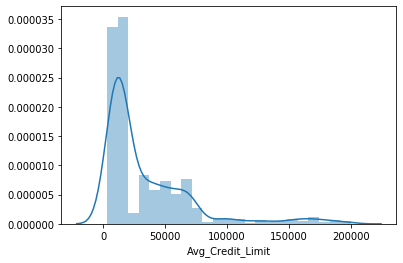

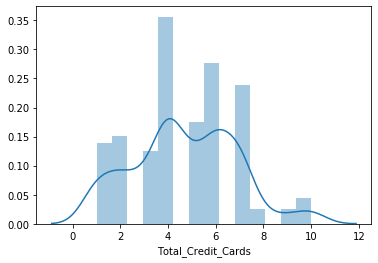

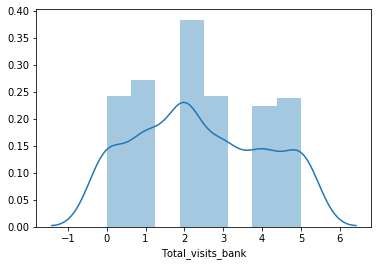

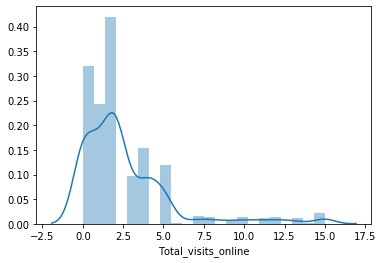

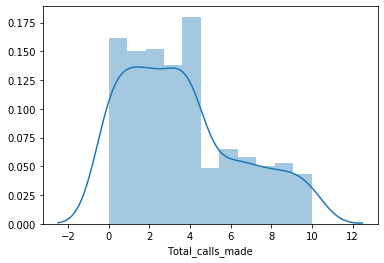

In [13]:
# As said earlier, customer key is attributing to an identifier for a customer and therefore significance level of it 
# towards the customer segmentation is nill. Lets see the distribution plot to find out how it is being distibuted and 
# whether it is normal distribution or left tailed or right tailed distribution. Also to find out whether it is unimodal
# or multimodal, therefore to create hypothesis how many customer segmentation sample data may have. 
for ind in df_bank_dt.columns.values:
    if ind not in ('Customer Key'):
        sns.distplot(df_bank_dt[ind],kde=True)
        plt.show()

### Information 

Bivariate Analysis to find out the relationship between independent variables 

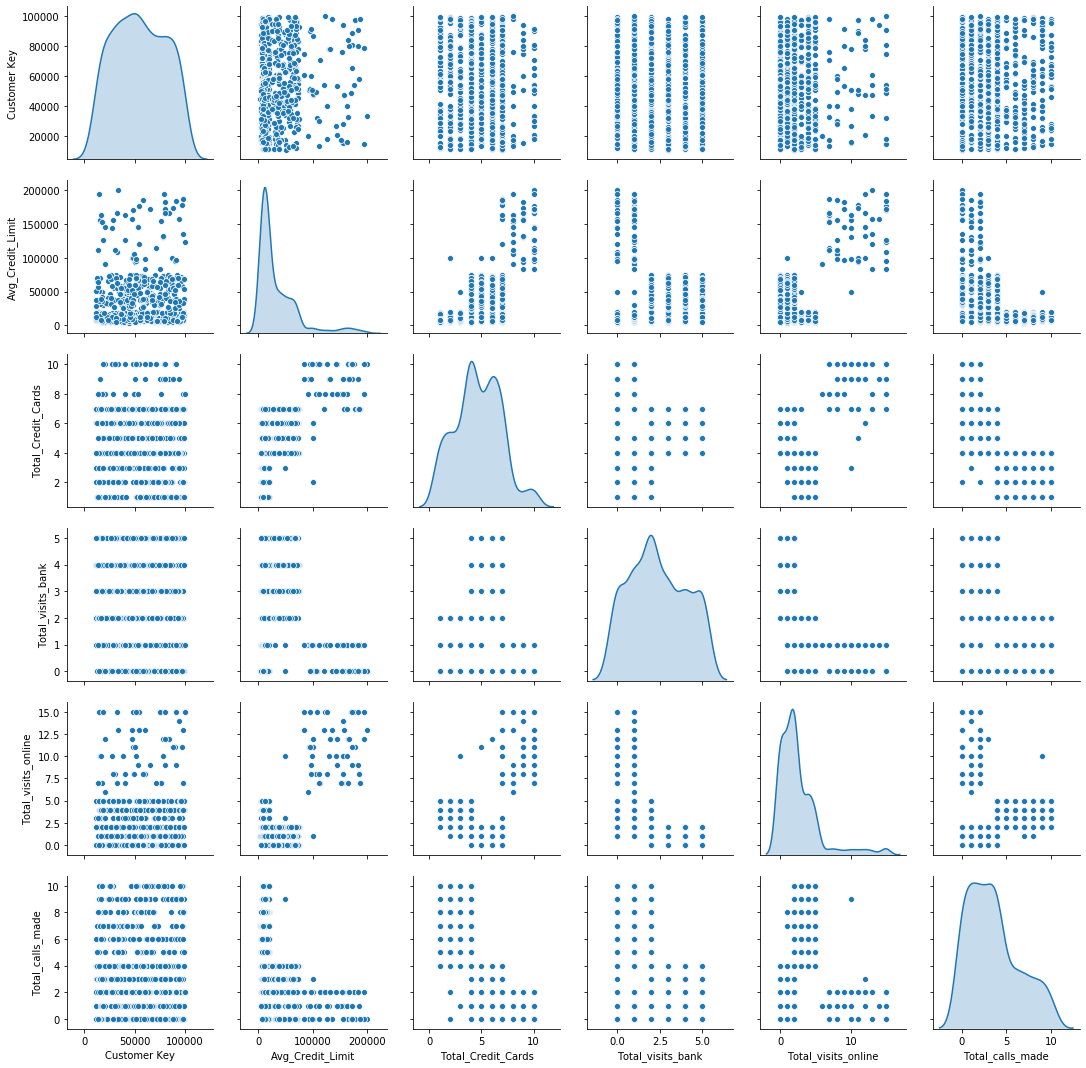

In [14]:
# Draw the pairplot to find out to find out whether there is coorelation between independent variables 
sns.pairplot(df_bank_dt,diag_kind = "kde" )

In [15]:
# Get the correlation matrix between independent variables 
df_bank_dt.corr()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


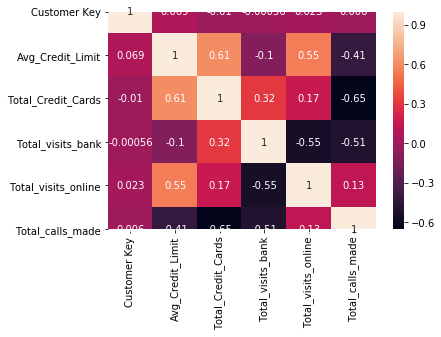

In [16]:
# Draw the correlation heat map depending upon the correlation matrix 
sns.heatmap(df_bank_dt.corr(), annot=True)

### Information 

From the univariate, bivariate analsysis below are the inputs can be gathered 
1. From the univariate analysis, this hypothesis can be build that there are at three cluster present in the sample data set. 

    1.1. Average Credit Limit, Total Credit Cards, Total Visits online and Total Calls made is right tailed distribution
    
2. From the correlation matrix, there is seems to be relationship between ( basis of relationship is if correlation value is more than 60%. 

    2.1. Postive Correlation between Average Credit Limit and Total Credit Card
    
    2.2. Total Credit Cards and total calls made 
    
Though the relationship there but there is no such strong relationship since none of the relationship correlation is more than 80 to 90. 

In [17]:
# Normalization of the fields using the z score 
from scipy.stats import zscore
df_bank_norm = df_bank_dt.loc[:,'Avg_Credit_Limit':'Total_calls_made']
df_bank_norm.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [18]:
df_bank_norm = df_bank_norm.apply(zscore)
df_bank_norm.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


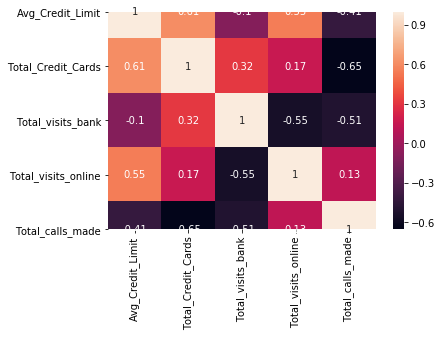

In [19]:
sns.heatmap(df_bank_norm.corr(),annot=True)

### Clustering using the centroid based cluster 

### Get the number of cluster using elbow method 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

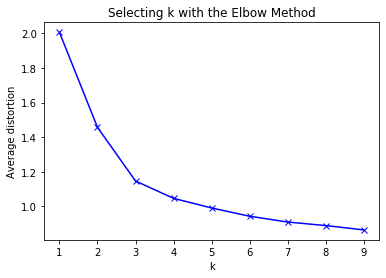

In [20]:
### Centroid Based Clustering 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    kMeans_mdl = KMeans(n_clusters=k)
    kMeans_mdl.fit(df_bank_norm)
    kMeans_predict = kMeans_mdl.predict(df_bank_norm)
    meanDistortions.append(sum(np.min(cdist(df_bank_norm, kMeans_mdl.cluster_centers_, 'euclidean'), axis=1)) / df_bank_norm.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


### Information 
From the above elbow graph, number of cluster after 3, rate of change is diminishing. So, number of cluster at which kmeans clustering to be performed is 3

In [21]:
#Set the value of k=3
mdl_kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [22]:
mdl_kmeans.fit(df_bank_norm)
kmeans_centroids = mdl_kmeans.cluster_centers_
df_kmeans_centroid = pd.DataFrame(kmeans_centroids, columns = list(df_bank_norm))
df_kmeans_centroid

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [23]:
## creating a new dataframe only for labels and converting it into categorical variable
df_kmeans_labels = pd.DataFrame(mdl_kmeans.labels_ , columns = list(['labels']))
df_kmeans_labels['labels'] = df_kmeans_labels['labels'].astype('category')
df_kmeans_labels.head()

,labels
0,1
1,0
2,1
3,1
4,2


In [24]:
# Joining the label dataframe with the data frame.
df_kmeans_group = df_bank_dt.join(df_kmeans_labels)
df_kmeans_group.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2


In [25]:
df_kmeans_group['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

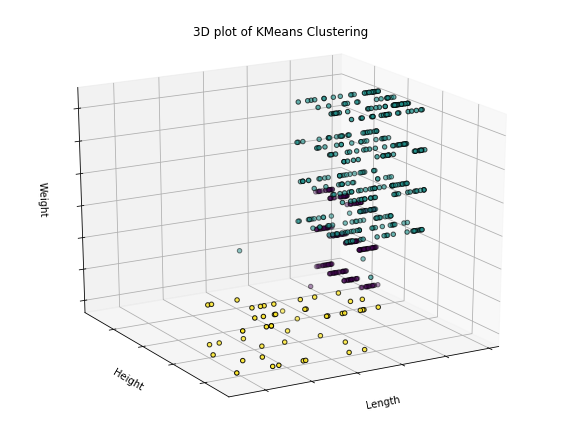

In [26]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(df_bank_norm)
labels = k3_model.labels_
ax.scatter(df_bank_norm.iloc[:, 0], df_bank_norm.iloc[:, 1], df_bank_norm.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [27]:
# Let us try with K = 3 (to demonstrate the 3d plot)
final_model=KMeans(3)
final_model.fit(df_bank_dt)
prediction=final_model.predict(df_bank_dt)

#Append the prediction 
df_bank_dt["GROUP"] = prediction
print("Groups Assigned : \n")
df_bank_dt
#df_bank[["adjdep", "GROUP"]]

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,1
5,58634,20000,3,0,1,8,2
6,48370,100000,5,0,11,2,1
7,37376,15000,3,0,1,1,0
8,82490,5000,2,0,2,2,2
9,44770,3000,4,0,1,7,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B87E5F1C8>,
      dtype=object)

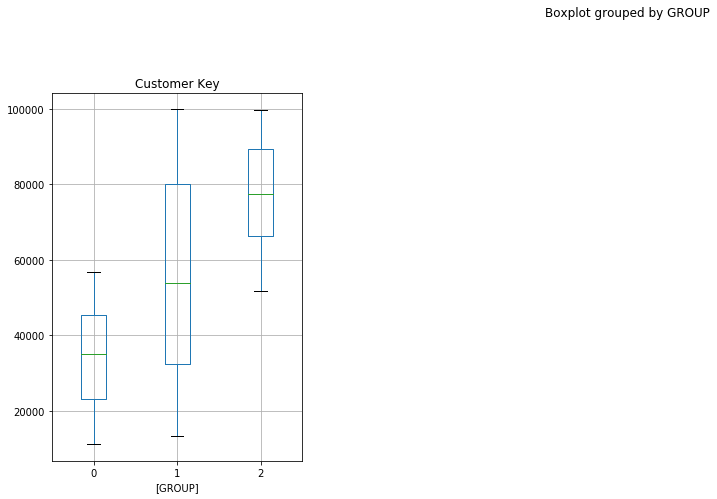

In [28]:
df_bank_dt.loc[:,['Customer Key','GROUP']].boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

### Information
Using the box plot for the clustering, Group 0 and Group 2 is distinct but group 1 is not distinct with group 0 and group 1

### Hierarchial Clustering

In [29]:
### Hierarchial Clusting based on the euclidean distance 

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_bank_norm, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [31]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

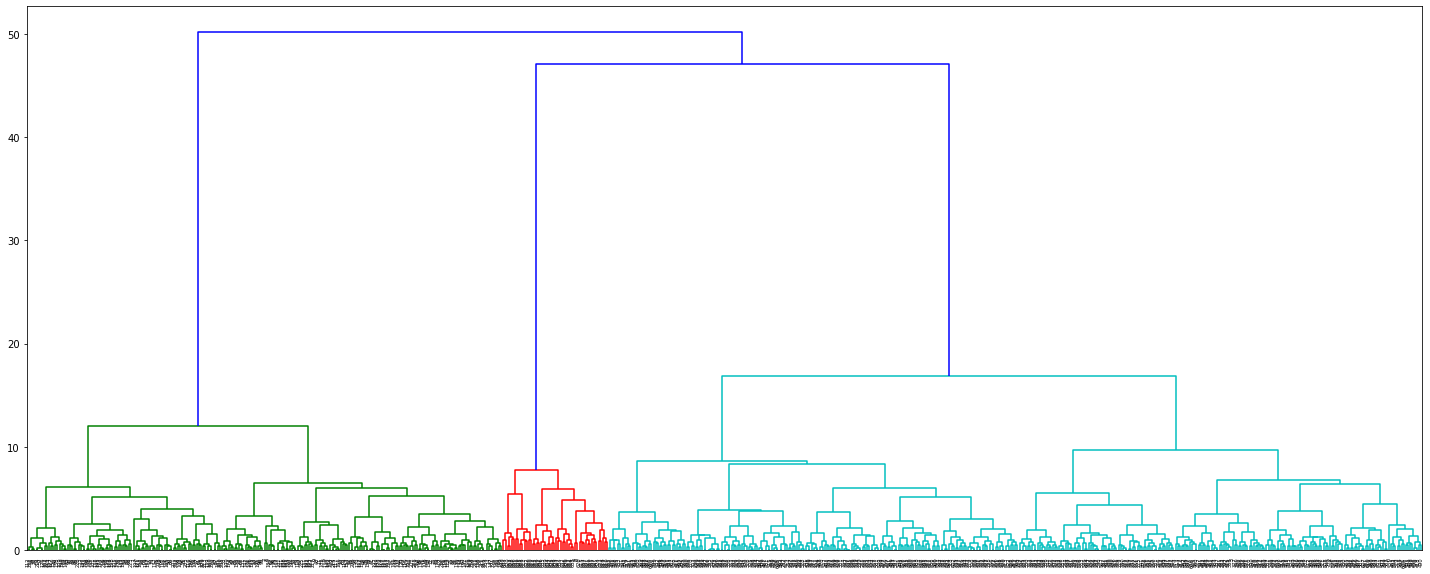

In [32]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()


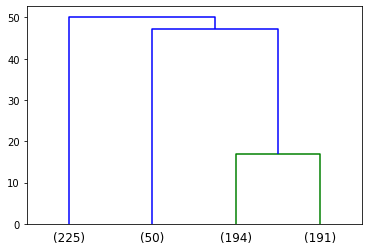

In [33]:
dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
           p=4                       # show only the last p merged clusters
          )
plt.show()

In [34]:
# Define the cophenetic distance distance to be not more than 18 
max_d = 18

In [35]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
pd.DataFrame(clusters)

,0
0,3
1,1
2,3
3,3
4,2
5,1
6,2
7,1
8,1
9,1


#### Information 
Depending the cophenetic distance not more than 18, there are three clusters formed

In [36]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(df_bank_norm,clusters)

0.5147639589977819

### Information . 
For an effective cluster silhouette score should be more towards value as 1. So, when the cophenetic distance increased beyond 18, silhouette score drops and so optimal cophenetic distance is 18

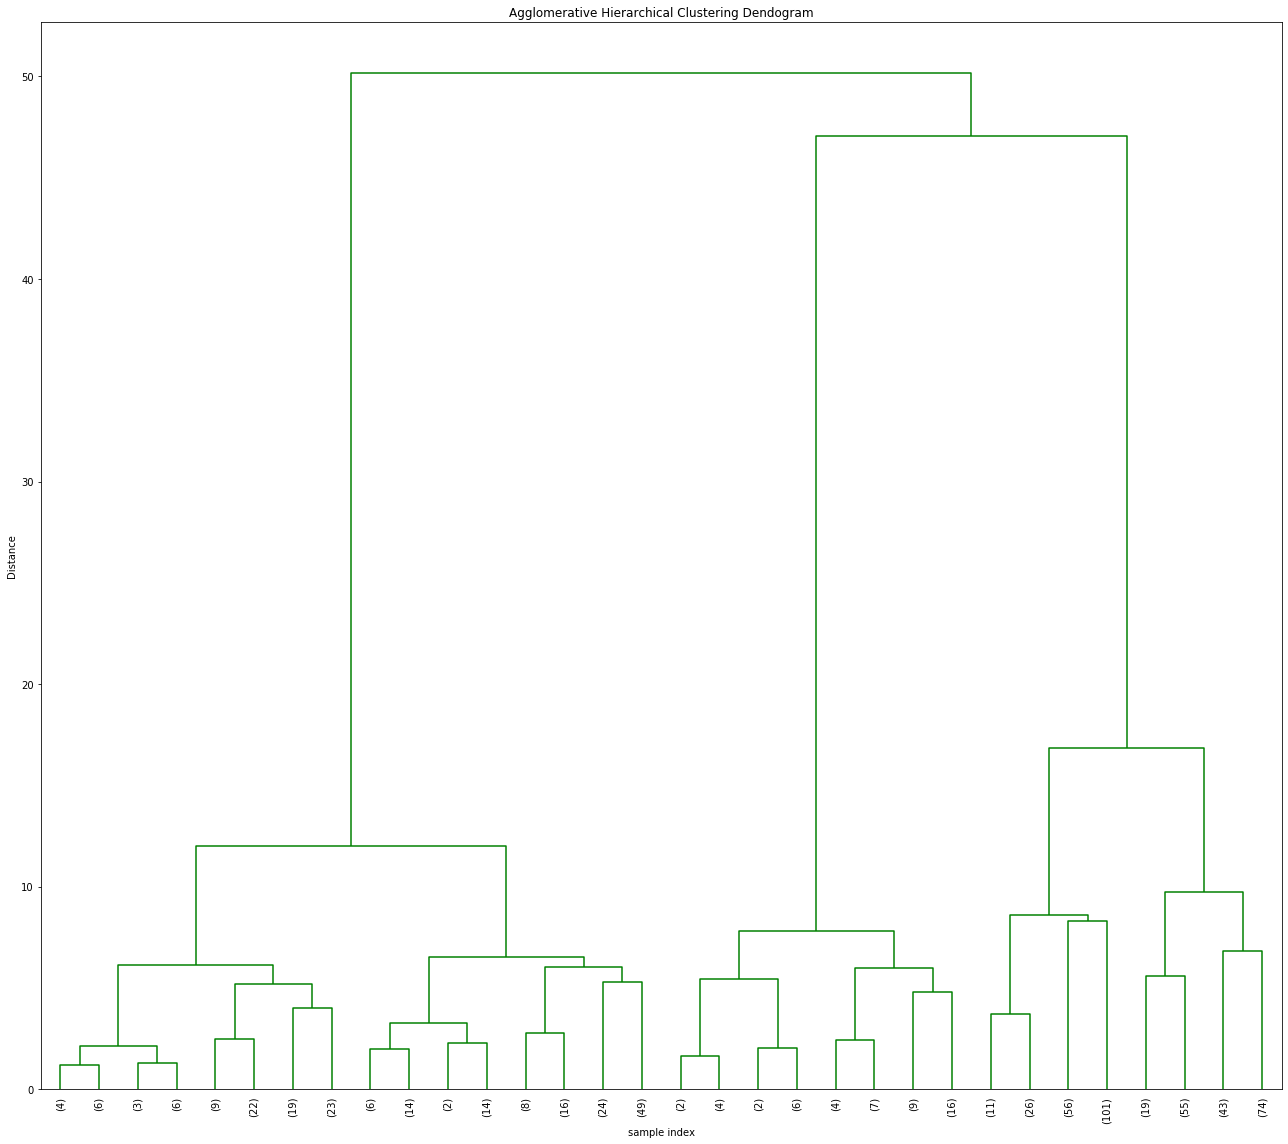

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_bank_norm, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=4,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [38]:
# Join the dataframe having the hirerachial cluster with orginal dataframe and compare with clustering 
# grouping with that of centroid based clustering 

df_bank_dt = df_bank_dt.join(pd.DataFrame(clusters))

In [39]:
df_bank_dt.rename(columns={0:'Customer_Seg'},inplace=True)

In [40]:
df_bank_dt

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,Customer_Seg
0,87073,100000,2,1,1,0,1,3
1,38414,50000,3,0,10,9,0,1
2,17341,50000,7,1,3,4,0,3
3,40496,30000,5,1,1,4,0,3
4,47437,100000,6,0,12,3,1,2
5,58634,20000,3,0,1,8,2,1
6,48370,100000,5,0,11,2,1,2
7,37376,15000,3,0,1,1,0,1
8,82490,5000,2,0,2,2,2,1
9,44770,3000,4,0,1,7,0,1


In [41]:
df_bank_dt.groupby('Customer_Seg').size()

Customer_Seg
1    225
2     50
3    385
dtype: int64

In [42]:
df_kmeans_group['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

In [43]:
### Using Adjusted Rand Square comparision of the cluster 
from sklearn.metrics.cluster import adjusted_rand_score

In [44]:
adjusted_rand_score(df_bank_dt['Customer_Seg'],df_kmeans_group['labels'])

0.9943663300699038

### Comparision between Kmeans cluster and Hirerachial cluster
Perfectly matching labelings have a score of 1, from the above adjusted Rand Square the value is closed to 1 which means both the cluster is close by 

#### Analysis the clusters formed 
Both the cluster is having 3 groups having group 1 having almost the same number of member but the next group is having the number of member as 50 as 386 which is vast difference. Same is the case with last group where one is having 50 and other is 385 members. 

Both the cluster is having 3 groups having group 1 having almost the same number of member but the next group is having the number of member as 50 as 386 which is vast difference. Same is the case with last group where one is having 50 and other is 385 members

How many different segments of customers are there? 
There are three Cluster are there in which customer can be segmented which can be seen by Centroid based clustering and Hirerachial based clustering as well. This was evident from the univariate analysis as well. 

How are these segments different from each other?
Though both Centroid and Hierachial based clustering having three cluster but both are different looking from group 2 and group 3 and its distribution. 

What are your recommendations to the bank on how to better market to and service these customers?
Customer can be segmented based on the Average Credit Limits and Total Credit Card Used to better market outreach.  